In [51]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

In [91]:
df = {}
for i in range(8):
    if i < 4:
        df[i] = pd.read_table('lpr_200'+str(i+6)+'.csv',sep=',')
    else:
        df[i] = pd.read_table('lpr_20'+str(i+6)+'.csv',sep=',')
    df[i] = df[i][0:8]
    df[i] = df[i].reindex(df[i].index.delete(4)).reset_index()

print df[0].shape,df[1].shape,df[2].shape,df[3].shape,df[4].shape,df[5].shape,df[6].shape,df[7].shape

(7, 58) (7, 58) (7, 58) (7, 58) (7, 58) (7, 58) (7, 58) (7, 58)


In [92]:
df[0]

,index,Origin,Total,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Texas,U.S. Armed Services Posts,U.S. Dependencies,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,Total,1266264,4278,1554,21530,2926,264677,12714,18700,...,89037,95,7080,5749,895,38488,23805,764,8341,376
1,1,Africa,117430,441,40,1804,143,9384,1843,1220,...,8623,6,21,602,246,7157,3057,78,688,23
2,2,Asia,422333,1739,819,4628,959,121890,3460,4345,...,24601,46,2131,1228,243,14433,9600,345,3706,123
3,3,Europe,164285,648,293,2235,274,25822,2181,4312,...,5261,14,182,745,189,3471,6144,131,1506,80
4,5,Northern America,165313,302,125,1200,70,3651,420,3109,...,3028,11,3649,304,129,1490,1067,59,315,34
5,6,Oceania,7385,24,41,122,24,3001,160,85,...,270,0,20,211,16,104,377,7,55,16
6,7,Latin America,472057,1189,271,11625,1465,100648,4723,8058,...,47680,18,3847,2717,89,12326,3603,164,2155,100


In [93]:
def clean(x):
    try:
        return int(x)
    except:
        pass

for i in range(8):
    df[i].fillna(0)
    pd.to_numeric(df[i],errors='ignore')

In [94]:
def line_plot(data,title,xlabel,ylabel,xticks,legend):
    plt.figure(figsize=(15,11))
    xvals = 0
    p = {}
    for i,val in enumerate(data):
        xvals = np.arange(len(val))
        p[i] = plt.plot(np.arange(len(val)),val)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=16)
    plt.ylabel(ylabel,fontsize=16)
    plt.xticks(xvals,xticks,fontsize=12)
    legend1 = [p[i][0] for i in p]
    plt.legend(legend1,legend,fontsize=12)
    
    import matplotlib.ticker as tkr
    formatter = tkr.ScalarFormatter(useMathText=False)
    formatter.set_scientific(False)
    
    plt.show()
    
# xticks = ('2006','2007','2008','2009','2010','2011','2012','2013','2014')
# legend = ('Asia','Europe','Latin America','Africa','Northern America','Oceania')
# title= 'Unemployment Rate from 2006-2014'
# ylabel = 'Percentage of Group\'s Workforce'
# xlabel = 'Years'

# line_plot([unemployment_asia,unemployment_europe,unemployment_latin_america,unemployment_africa,unemployment_northern_america,unemployment_oceania],title,xlabel,ylabel,xticks,legend)

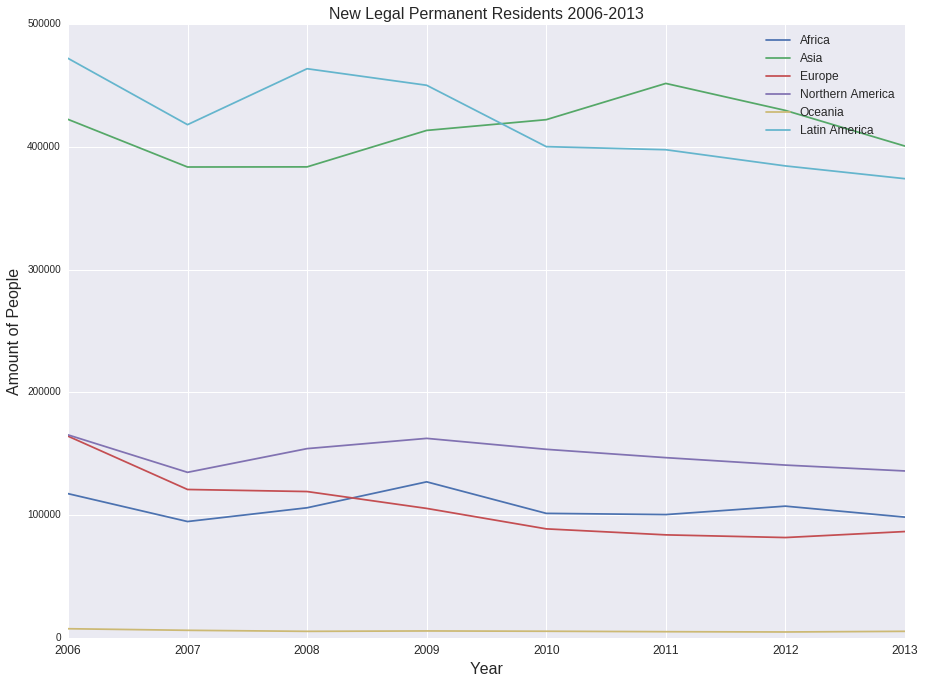

In [95]:
plt.figure(figsize=(15,11))
total_africa = [df[i]['Total'].loc[1] for i in range(8)]
total_asia = [df[i]['Total'].loc[2] for i in range(8)]
total_europe = [df[i]['Total'].loc[3] for i in range(8)]
total_north = [df[i]['Total'].loc[4] for i in range(8)]
total_oceania = [df[i]['Total'].loc[5] for i in range(8)]
total_latin = [df[i]['Total'].loc[6] for i in range(8)]
xticks = ('2006','2007','2008','2009','2010','2011','2012','2013')
legend = ('Africa','Asia','Europe','Northern America','Oceania','Latin America')

line_plot([total_africa,total_asia,total_europe,total_north,total_oceania,total_latin],'New Legal Permanent Residents 2006-2013','Year','Amount of People',xticks,legend)

In [96]:
years_change = defaultdict(dict)
for data in df.keys():
    for col in df[data].columns:  
        if col == 'index' or col == 'Origin':
            continue
        else:
            try:
                years_change[data][col] = df[data].nlargest(4, col)[col].to_dict()
            except:
                print data,col
years_change

defaultdict(<type 'dict'>, {0: {'Mississippi': {0: 1480.0, 2: 704.0, 3: 183.0, 6: 411.0}, 'South Dakota': {0: 1013.0, 1: 367.0, 2: 213.0, 3: 217.0}, 'Oklahoma': {0: 4591.0, 1: 465.0, 2: 1785.0, 6: 1718.0}, 'Delaware': {0: 2265.0, 1: 430.0, 2: 751.0, 6: 733.0}, 'Minnesota': {0: 18254.0, 1: 7308.0, 2: 6479.0, 6: 2033.0}, 'Illinois': {0: 52459.0, 2: 17774.0, 3: 14305.0, 6: 15706.0}, 'Arkansas': {0: 2926.0, 2: 959.0, 3: 274.0, 6: 1465.0}, 'New Mexico': {0: 3805.0, 2: 775.0, 3: 320.0, 6: 2284.0}, 'Indiana': {0: 8125.0, 2: 3090.0, 3: 1281.0, 6: 2248.0}, 'Maryland': {0: 30204.0, 1: 8808.0, 2: 9622.0, 6: 7849.0}, 'Louisiana': {0: 2693.0, 2: 1274.0, 3: 306.0, 6: 713.0}, 'Idaho': {0: 2377.0, 2: 533.0, 3: 504.0, 6: 1033.0}, 'Wyoming': {0: 376.0, 2: 123.0, 3: 80.0, 6: 100.0}, 'Tennessee': {0: 10042.0, 1: 2511.0, 2: 3822.0, 6: 2034.0}, 'Arizona': {0: 21530.0, 2: 4628.0, 3: 2235.0, 6: 11625.0}, 'Iowa': {0: 4086.0, 1: 729.0, 2: 1167.0, 6: 1396.0}, 'Michigan': {0: 20911.0, 2: 10281.0, 3: 4893.0, 6: 25

In [97]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [98]:
origin = {0:'Total',1:'Africa',2:'Asia',3:'Europe',4:'Northern America',5:'Oceania',6:'Latin America'}

top_groups = {}
for ab,state in states.iteritems():
    top_groups[state] = list()
    
for i in range(8):
    for ab,state in states.iteritems():
        groups = dict()
        for place in years_change[i][state]:
            groups[origin[place]] = years_change[i][state][place]
        groups = sorted(groups,key=groups.get,reverse=True)
        top_groups[state].append(groups)

top_groups

{'Alabama': [['Total', 'Asia', 'Latin America', 'Europe'],
  ['Total', 'Asia', 'Latin America', 'Europe'],
  ['Total', 'Asia', 'Latin America', 'Europe'],
  ['Total', 'Asia', 'Latin America', 'Africa'],
  ['Total', 'Asia', 'Latin America', 'Africa'],
  ['Total', 'Asia', 'Latin America', 'Africa'],
  ['Total', 'Asia', 'Latin America', 'Africa'],
  ['Total', 'Asia', 'Latin America', 'Africa']],
 'Alaska': [['Total', 'Asia', 'Europe', 'Latin America'],
  ['Total', 'Asia', 'Latin America', 'Europe'],
  ['Total', 'Asia', 'Latin America', 'Europe'],
  ['Total', 'Asia', 'Latin America', 'Europe'],
  ['Total', 'Asia', 'Latin America', 'Europe'],
  ['Total', 'Asia', 'Latin America', 'Europe'],
  ['Total', 'Asia', 'Latin America', 'Europe'],
  ['Total', 'Asia', 'Latin America', 'Europe']],
 'Arizona': [['Total', 'Latin America', 'Asia', 'Europe'],
  ['Total', 'Latin America', 'Asia', 'Europe'],
  ['Total', 'Latin America', 'Asia', 'Africa'],
  ['Total', 'Latin America', 'Asia', 'Africa'],
  ['To

In [99]:
df_temp = {}
group_years_change = defaultdict(dict)
for data in df.keys():
    df_temp[data] = df[data].transpose()[2:].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    df_temp[data].columns = ['Total','Africa','Asia','Europe','Northern America','Oceania','Latin America']
    for col in df_temp[data].columns:
        group_years_change[data][col] = df_temp[data].nlargest(6, col)[col].to_dict()
#group_years_change

In [100]:
african = []
asian = []
european = []
northern = []
oceanic = []
latin = []
total = []
for i in range(8):
    asian.append(group_years_change[i]['Asia'])
    african.append(group_years_change[i]['Africa'])
    european.append(group_years_change[i]['Europe'])
    northern.append(group_years_change[i]['Northern America'])
    oceanic.append(group_years_change[i]['Oceania'])
    latin.append(group_years_change[i]['Latin America'])
    total.append(group_years_change[i]['Total'])

tot_asia = []
tot_africa = []
tot_europe = []
tot_north = []
tot_oceania = []
tot_latin = []
tot_tot = []
    
for i in range(8):
    tot_asia.append(sorted(asian[i],key=asian[i].get,reverse=True))
    tot_africa.append(sorted(african[i],key=african[i].get,reverse=True))
    tot_europe.append(sorted(european[i],key=european[i].get,reverse=True))
    tot_north.append(sorted(northern[i],key=northern[i].get,reverse=True))
    tot_oceania.append(sorted(oceanic[i],key=oceanic[i].get,reverse=True))
    tot_latin.append(sorted(latin[i],key=latin[i].get,reverse=True))
    tot_tot.append(sorted(total[i],key=total[i].get,reverse=True))


In [101]:
print 'Asia:'
tot_asia

Asia:


[['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois']]

In [102]:
print 'Africa:'
tot_africa

Africa:


[['Total', 'New York', 'California', 'Maryland', 'Texas', 'Minnesota'],
 ['Total', 'New York', 'California', 'Maryland', 'Texas', 'Massachusetts'],
 ['Total', 'New York', 'Maryland', 'California', 'Minnesota', 'Texas'],
 ['Total', 'New York', 'Texas', 'Minnesota', 'California', 'Maryland'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'New Jersey'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'Massachusetts'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'Massachusetts'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'New Jersey']]

In [103]:
print 'Europe:'
tot_europe

Europe:


[['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'California', 'New York', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey']]

In [104]:
print 'Northern America:'
tot_north

Northern America:


[['Total', 'Florida', 'New York', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'Florida', 'New York', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'Florida', 'New York', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'Florida', 'New York', 'New Jersey', 'Massachusetts', 'California'],
 ['Total',
  'Florida',
  'New York',
  'New Jersey',
  'Massachusetts',
  'Pennsylvania'],
 ['Total',
  'Florida',
  'New York',
  'New Jersey',
  'Massachusetts',
  'Pennsylvania'],
 ['Total',
  'Florida',
  'New York',
  'New Jersey',
  'Massachusetts',
  'Pennsylvania'],
 ['Total',
  'Florida',
  'New York',
  'New Jersey',
  'Massachusetts',
  'Pennsylvania']]

In [105]:
print 'Oceania:'
tot_oceania

Oceania:


[['Total', 'California', 'New York', 'Washington', 'Florida', 'Texas'],
 ['Total', 'California', 'New York', 'Washington', 'Hawaii', 'Texas'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Hawaii'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Florida'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Utah'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Utah'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Florida'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Utah']]

In [106]:
print 'Latin America:'
tot_latin

Latin America:


[['Total', 'California', 'Florida', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey']]

In [107]:
print 'Total:'
tot_tot

Total:


[['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey']]

In [108]:
fin = df[0].append(df[1])
fin = fin.append(df[2])
fin = fin.append(df[3])
fin = fin.append(df[4])
fin = fin.append(df[5])
fin = fin.append(df[6])
fin = fin.append(df[7])
#print df[0].shape,df[1].shape,df[2].shape,df[3].shape,df[4].shape,df[5].shape,df[6].shape,df[7].shape

In [109]:
df[7]

,index,Origin,Total,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Texas,U.S. Armed Services Posts,U.S. Territories,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,Total,990553,3848,1460,16097,2900,191806,11108,10985,...,92674,112,1267,5503,838,27861,22994,760,5918,522
1,1,Africa,98304,456,107,1102,169,7321,1846,860,...,8901,13,NaN,515,65,5002,2940,117,627,54
2,2,Asia,400548,1877,888,4900,1109,102464,3899,3568,...,30819,64,456,1782,475,13435,11993,391,2797,150
3,3,Europe,86556,384,166,1082,178,12861,1049,1672,...,4304,15,29,383,135,2182,3113,71,739,80
4,5,Northern America,135908,210,116,721,95,3135,391,2330,...,3427,0,750,233,106,1147,1045,76,254,51
5,6,Oceania,5277,21,42,67,11,1857,112,57,...,280,NaN,3,197,6,91,320,NaN,18,NaN
6,7,Latin America,373981,1000,192,8516,1367,64237,3913,4489,...,46607,9,446,2473,89,6701,3649,137,1561,189


In [110]:
fin = fin.transpose()
fin = fin.ix[:-1]

In [111]:
columns = []
for i in range(8):
    if i < 4:
        year = '200'+str(i+6)
    else:
        year = '20'+str(i+6)
    for j in range(7):
        columns.append(origin[j]+'_'+year)
fin.columns = columns

In [116]:
fin['Abbreviations'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','OG','PA','PR','RI','SC','SD','TN','TX','TO','UA','UD','US','UT','VT','VA','WA','WV','WI','WY']


ValueError: Length of values does not match length of index

In [113]:
print '2006'
print fin[fin.Abbreviations == 'FL']['Northern America_2006']
print fin[fin.Abbreviations == 'FL']['Latin America_2006']
print '2007'
print fin[fin.Abbreviations == 'FL']['Northern America_2007']
print fin[fin.Abbreviations == 'FL']['Latin America_2007']
print '2008'
print fin[fin.Abbreviations == 'FL']['Northern America_2008']
print fin[fin.Abbreviations == 'FL']['Latin America_2008']
print '2009'
print fin[fin.Abbreviations == 'FL']['Northern America_2009']
print fin[fin.Abbreviations == 'FL']['Latin America_2009']
print '2010'
print fin[fin.Abbreviations == 'FL']['Northern America_2010']
print fin[fin.Abbreviations == 'FL']['Latin America_2010']
print '2011'
print fin[fin.Abbreviations == 'FL']['Northern America_2011']
print fin[fin.Abbreviations == 'FL']['Northern America_2012']
print fin[fin.Abbreviations == 'FL']['Northern America_2013']

2006
Florida    65818
Name: Northern America_2006, dtype: object
Florida    79698
Name: Latin America_2006, dtype: object
2007
Florida    53109
Name: Northern America_2007, dtype: object
Florida    95938
Name: Latin America_2007, dtype: object
2008
Florida    67427
Name: Northern America_2008, dtype: object
Florida    105653
Name: Latin America_2008, dtype: object
2009
Florida    59511
Name: Northern America_2009, dtype: object
Florida    98464
Name: Latin America_2009, dtype: object
2010
Florida    51430
Name: Northern America_2010, dtype: object
Florida    80936
Name: Latin America_2010, dtype: object
2011
Florida    52945
Name: Northern America_2011, dtype: object
Florida    49411
Name: Northern America_2012, dtype: object
Florida    48197
Name: Northern America_2013, dtype: object


In [114]:
remove = ['GU','OG','PR','UA','UD','US']
for place in remove:
    fin = fin[fin['Abbreviations'] != place]
fin

,Total_2006,Africa_2006,Asia_2006,Europe_2006,Northern America_2006,Oceania_2006,Latin America_2006,Total_2007,Africa_2007,Asia_2007,...,Oceania_2012,Latin America_2012,Total_2013,Africa_2013,Asia_2013,Europe_2013,Northern America_2013,Oceania_2013,Latin America_2013,Abbreviations
Alabama,4278,441,1739,648,302,24,1189,3393,385,1489,...,7,1131,3848,456,1877,384,210,21,1000,AL
Alaska,1554,40,819,293,125,41,271,1617,68,966,...,37,293,1460,107,888,166,116,42,192,AK
Arizona,21530,1804,4628,2235,1200,122,11625,17528,1250,4291,...,83,9203,16097,1102,4900,1082,721,67,8516,AZ
Arkansas,2926,143,959,274,70,24,1465,2722,118,878,...,9,1345,2900,169,1109,178,95,11,1367,AR
California,264677,9384,121890,25822,3651,3001,100648,228941,8035,114231,...,1732,66418,191806,7321,102464,12861,3135,1857,64237,CA
Colorado,12714,1843,3460,2181,420,160,4723,11039,1608,3237,...,128,4313,11108,1846,3899,1049,391,112,3913,CO
Connecticut,18700,1220,4345,4312,3109,85,8058,12932,963,3917,...,46,4925,10985,860,3568,1672,2330,57,4489,CT
Delaware,2265,430,751,271,300,4,733,2085,412,812,...,6,662,2325,459,959,183,361,3,665,DE
District of Columbia,3775,1240,654,485,306,26,1221,2541,887,441,...,19,676,2981,1106,732,384,209,NaN,644,DC
Florida,155996,3690,16807,12463,65818,292,79698,126277,2964,14135,...,175,77127,102939,2730,13023,7983,48197,177,76162,FL


In [115]:
fin.to_csv('final_df.csv',sep=',')